# **Generating Dataset**

### Deleting 0.95% of pics , so now instead of 3000 we have to train from 150 pics only

In [ ]:
# import os
# import random

# folder_path = "C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_train\\asl_alphabet_train\\A"

# files = os.listdir(folder_path)

# # Calculate the number of files to delete (90% of the total files)
# num_files_to_delete = int(0.95 * len(files))

# # Randomly select files to delete
# files_to_delete = random.sample(files, num_files_to_delete)

# # Iterate through the files to delete and remove them
# for file_name in files_to_delete:
#     file_path = os.path.join(folder_path, file_name)
#     os.remove(file_path)

### checking whether it is done and contains 150 items only

In [ ]:
# def count_items(path):
#   """Counts the number of items (files and directories) in a given path.

#   Args:
#     path: The path to the directory.

#   Returns:
#     The number of items in the directory.
#   """
#   if not os.path.exists(path):
#     raise ValueError(f"Path '{path}' does not exist.")
#   return sum(os.path.isfile(os.path.join(path, item)) for item in os.listdir(path))

# # Example usage
# path = "C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_train\\asl_alphabet_train\\A"
# try:
#   number_of_items = count_items(path)
#   print(f"The directory '{path}' contains {number_of_items} items.")
# except ValueError as e:
#   print(e)


In [ ]:
# import os
# from PIL import Image

# # Specify the folder containing the subfolders with images
# main_folder = "C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_train\\asl_alphabet_train"

# # Define the target size for resizing
# target_size = (224, 224)

# # Iterate through each folder
# for folder_name in os.listdir(main_folder):
#     folder_path = os.path.join(main_folder, folder_name)
#     if os.path.isdir(folder_path):
#         print("Processing folder:", folder_name)
#         # Iterate through each image file in the folder
#         for filename in os.listdir(folder_path):
#             if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more extensions if needed
#                 image_path = os.path.join(folder_path, filename)
#                 # Open the image using PIL
#                 img = Image.open(image_path)
#                 # Resize the image
#                 img_resized = img.resize(target_size, Image.LANCZOS)  # Resizing with Lanczos resampling for anti-aliasing
#                 # Save the resized image, overwriting the original
#                 img_resized.save(image_path)
#                 print("Resized:", filename)

# print("Resizing complete.")

# **Creating model**

### 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define paths
train_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_train\\asl_alphabet_train'

# ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model architecture
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hirtory = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25
)
# Save the model
# model.save('asl_alphabet_model_1.h5')


Found 4350 images belonging to 29 classes.
Epoch 1/25


C:\Users\sai\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.0342 - loss: 3.4586
Epoch 2/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 156us/step - accuracy: 0.0312 - loss: 3.3587  
Epoch 3/25


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


135/135 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.0625 - loss: 3.3134
Epoch 4/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 74us/step - accuracy: 0.0938 - loss: 3.1571   
Epoch 5/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 137s 997ms/step - accuracy: 0.1097 - loss: 3.1394
Epoch 6/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 0.1250 - loss: 3.1528   
Epoch 7/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 137s 996ms/step - accuracy: 0.1361 - loss: 2.9921
Epoch 8/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 0.2500 - loss: 2.5891   
Epoch 9/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1730 - loss: 2.7883
Epoch 10/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 0.2812 - loss: 2.6264   
Epoch 11/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.1987 - loss: 2.6466
Epoch 12/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 60us/step - accuracy: 0.2500 - loss: 2.4557   
Epoch 13/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.2537 - loss: 2.4709
Epoch 14/25
135/135 ━━━━━━━━━

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
from sklearn.metrics import classification_report, confusion_matrix

# Define paths
test_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_test\\asl_alphabet_test'

# Load the model
model_1 = load_model('asl_alphabet_model_1.h5')

# Function to preprocess the image and make predictions
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Corrected target size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model_1.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

# Initialize lists to keep track of actual and predicted labels
y_true = []
y_pred = []

# Test the model on the test dataset
for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    predicted_class = predict_image(img_path)
    actual_class = img_file.split('_')[0]
    y_true.append(actual_class)
    y_pred.append(predicted_class)

# Convert actual class labels from string to integers
class_indices = train_generator.class_indices
inverse_class_indices = {v: k for k, v in class_indices.items()}
y_true = [class_indices[label] for label in y_true]

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=list(class_indices.keys()))

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras import models

modelll = models.load_model('asl_alphabet_model_1.h5')
modelll.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,410,975 (169.41 MB)

 Trainable params: 44,410,973 (169.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.models import load_model

# plot_model(modelll, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

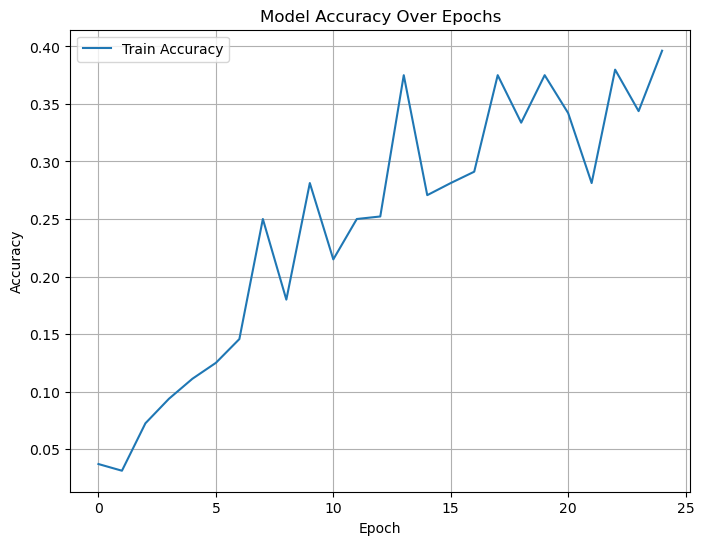

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(hirtory.history['accuracy'], label='Train Accuracy')
# plt.plot(hirtory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

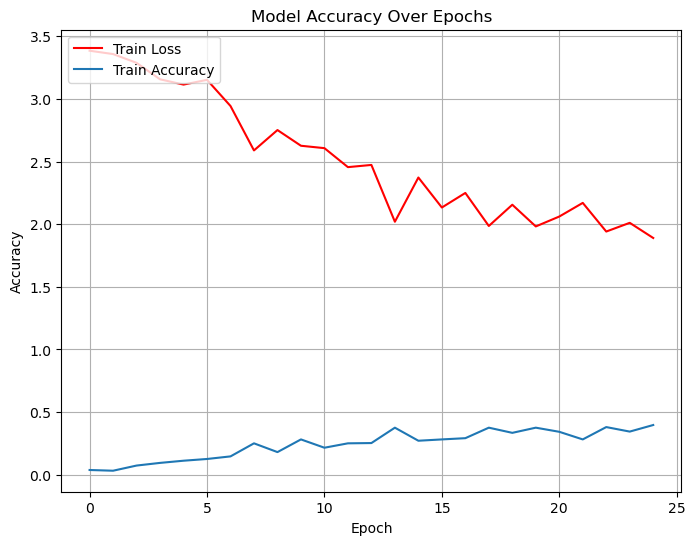

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(hirtory.history['loss'], label='Train Loss',color='red')
plt.plot(hirtory.history['accuracy'], label='Train Accuracy')
# plt.plot(hirtory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define paths
train_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_train\\asl_alphabet_train'

# ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model architecture
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15
)

# Save the model
# model.save('asl_alphabet_model_2.h5')


Found 4350 images belonging to 29 classes.
Epoch 1/15


C:\Users\sai\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.0325 - loss: 13.6222
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 89us/step - accuracy: 0.0000e+00 - loss: 3.3753
Epoch 3/15


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


135/135 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.0332 - loss: 3.3703
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 67us/step - accuracy: 0.0000e+00 - loss: 3.3707
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.0311 - loss: 3.3692
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 58us/step - accuracy: 0.0312 - loss: 3.3724
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.0260 - loss: 3.3698
Epoch 8/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 74us/step - accuracy: 0.0000e+00 - loss: 3.3830
Epoch 9/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.0259 - loss: 3.3692
Epoch 10/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 74us/step - accuracy: 0.0000e+00 - loss: 3.3689
Epoch 11/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.0341 - loss: 3.3694
Epoch 12/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 75us/step - accuracy: 0.0625 - loss: 3.3770
Epoch 13/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.0306 - loss: 3.3695
Epoch 14/15
135/135 ━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
from sklearn.metrics import classification_report, confusion_matrix

# Define paths
test_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_test\\asl_alphabet_test'

# Load the model
model_2 = load_model('asl_alphabet_model_2.h5')

# Function to preprocess the image and make predictions
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Corrected target size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model_2.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

# Initialize lists to keep track of actual and predicted labels
y_true = []
y_pred = []

# Test the model on the test dataset
for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    predicted_class = predict_image(img_path)
    actual_class = img_file.split('_')[0]
    y_true.append(actual_class)
    y_pred.append(predicted_class)

# Convert actual class labels from string to integers
class_indices = train_generator.class_indices
inverse_class_indices = {v: k for k, v in class_indices.items()}
y_true = [class_indices[label] for label in y_true]

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=list(class_indices.keys()))

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define paths
train_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_train\\asl_alphabet_train'

# ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model architecture
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20
)

# Save the model
# model.save('asl_alphabet_model_3.h5')


Found 4350 images belonging to 29 classes.
Epoch 1/20


C:\Users\sai\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.0306 - loss: 3.4108
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 112us/step - accuracy: 0.0312 - loss: 3.3675
Epoch 3/20


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


135/135 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.0361 - loss: 3.3674
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 82us/step - accuracy: 0.0000e+00 - loss: 3.3681
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.0314 - loss: 3.3679
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 89us/step - accuracy: 0.0625 - loss: 3.3674
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.0313 - loss: 3.3676
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 97us/step - accuracy: 0.0312 - loss: 3.3683
Epoch 9/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.0420 - loss: 3.3448
Epoch 10/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 89us/step - accuracy: 0.0312 - loss: 3.2917
Epoch 11/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.0502 - loss: 3.3145
Epoch 12/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 0.0938 - loss: 3.3704   
Epoch 13/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.0695 - loss: 3.2871
Epoch 14/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
from sklearn.metrics import classification_report, confusion_matrix

# Define paths
test_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_test\\asl_alphabet_test'

# Load the model
model_3 = load_model('asl_alphabet_model_3.h5')

# Function to preprocess the image and make predictions
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Corrected target size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model_3.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

# Initialize lists to keep track of actual and predicted labels
y_true = []
y_pred = []

# Test the model on the test dataset
for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    predicted_class = predict_image(img_path)
    actual_class = img_file.split('_')[0]
    y_true.append(actual_class)
    y_pred.append(predicted_class)

# Convert actual class labels from string to integers
class_indices = train_generator.class_indices
inverse_class_indices = {v: k for k, v in class_indices.items()}
y_true = [class_indices[label] for label in y_true]

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=list(class_indices.keys()))

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hyperparameter tuning

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
# from tensorflow.keras.optimizers import Adam
# import keras_tuner as kt

# # Define paths
# train_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_train\\asl_alphabet_train'

# # ImageDataGenerator for data augmentation and rescaling
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical'
# )

# # Define the model building function
# def build_model(hp):
#     model = Sequential()
#     model.add(Input(shape=(224, 224, 3)))
#     model.add(Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
#         activation='relu'
#     ))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
#         activation='relu'
#     ))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(
#         filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
#         activation='relu'
#     ))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(
#         units=hp.Int('dense_units', min_value=128, max_value=512, step=32),
#         activation='relu'
#     ))
#     model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
#     model.add(Dense(29, activation='softmax'))

#     model.compile(
#         optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
#         loss='categorical_crossentropy',
#         metrics=['accuracy']
#     )

#     return model

# # Initialize the tuner
# tuner = kt.Hyperband(
#     build_model,
#     objective='val_accuracy',
#     max_epochs=10,
#     factor=3,
#     directory='my_dir',
#     project_name='asl_tuning'
# )

# # Perform hyperparameter search
# tuner.search(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=10,
#     validation_data=train_generator,
#     validation_steps=train_generator.samples // train_generator.batch_size // 5
# )

# # Retrieve the best model
# best_model = tuner.get_best_models(num_models=1)[0]

# # Save the best model
# best_model.save('asl_alphabet_best_model.h5')


In [ ]:
# import numpy as np
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import load_model
# import os
# from sklearn.metrics import classification_report, confusion_matrix

# # Define paths
# test_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_test\\asl_alphabet_test'

# # Load the model
# model_best = load_model('asl_alphabet_best_model.h5')

# # Function to preprocess the image and make predictions
# def predict_image(img_path):
#     img = image.load_img(img_path, target_size=(224, 224))  # Corrected target size
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0

#     prediction = model_best.predict(img_array)
#     predicted_class = np.argmax(prediction, axis=1)
#     return predicted_class[0]

# # Initialize lists to keep track of actual and predicted labels
# y_true = []
# y_pred = []

# # Test the model on the test dataset
# for img_file in os.listdir(test_dir):
#     img_path = os.path.join(test_dir, img_file)
#     predicted_class = predict_image(img_path)
#     actual_class = img_file.split('_')[0]
#     y_true.append(actual_class)
#     y_pred.append(predicted_class)

# # Convert actual class labels from string to integers
# class_indices = train_generator.class_indices
# inverse_class_indices = {v: k for k, v in class_indices.items()}
# y_true = [class_indices[label] for label in y_true]

# # Calculate confusion matrix and classification report
# conf_matrix = confusion_matrix(y_true, y_pred)
# class_report = classification_report(y_true, y_pred, target_names=list(class_indices.keys()))

# # Print the results
# print("Confusion Matrix:\n", conf_matrix)
# print("\nClassification Report:\n", class_report)

### 4

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define paths
train_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_train\\asl_alphabet_train'

# ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model architecture
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=40
)

# Save the model
# model.save('asl_alphabet_model_4.h5')


Found 4350 images belonging to 29 classes.
Epoch 1/40


C:\Users\sai\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 ━━━━━━━━━━━━━━━━━━━━ 135s 963ms/step - accuracy: 0.0354 - loss: 3.8857
Epoch 2/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 97us/step - accuracy: 0.0312 - loss: 3.3765   
Epoch 3/40


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


135/135 ━━━━━━━━━━━━━━━━━━━━ 134s 975ms/step - accuracy: 0.0308 - loss: 3.3670
Epoch 4/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 74us/step - accuracy: 0.0625 - loss: 3.3606   
Epoch 5/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 133s 965ms/step - accuracy: 0.0446 - loss: 3.3423
Epoch 6/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 0.0312 - loss: 3.2911   
Epoch 7/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 132s 958ms/step - accuracy: 0.0739 - loss: 3.2949
Epoch 8/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 74us/step - accuracy: 0.0938 - loss: 3.2128   
Epoch 9/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 132s 956ms/step - accuracy: 0.0957 - loss: 3.2202
Epoch 10/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 0.0938 - loss: 3.1836   
Epoch 11/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 131s 955ms/step - accuracy: 0.1350 - loss: 3.0456
Epoch 12/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 0.1875 - loss: 3.0242   
Epoch 13/40
135/135 ━━━━━━━━━━━━━━━━━━━━ 136s 973ms/step - accuracy: 0.1682 - loss: 2.8601
Epoch 14/40
135/1

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
from sklearn.metrics import classification_report, confusion_matrix

# Define paths
test_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_test\\asl_alphabet_test'

# Load the model
model_4 = load_model('asl_alphabet_model_4.h5')

# Function to preprocess the image and make predictions
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Corrected target size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model_4.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

# Initialize lists to keep track of actual and predicted labels
y_true = []
y_pred = []

# Test the model on the test dataset
for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    predicted_class = predict_image(img_path)
    actual_class = img_file.split('_')[0]
    y_true.append(actual_class)
    y_pred.append(predicted_class)

# Convert actual class labels from string to integers
class_indices = train_generator.class_indices
inverse_class_indices = {v: k for k, v in class_indices.items()}
y_true = [class_indices[label] for label in y_true]

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=list(class_indices.keys()))

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define paths
train_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_train\\asl_alphabet_train'

# ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model architecture
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hiptory=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25
)

# Save the model
# model.save('asl_alphabet_model_5.h5')


Found 4350 images belonging to 29 classes.
Epoch 1/25


C:\Users\sai\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


135/135 ━━━━━━━━━━━━━━━━━━━━ 127s 927ms/step - accuracy: 0.0545 - loss: 3.6997
Epoch 2/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 97us/step - accuracy: 0.1562 - loss: 3.0865   
Epoch 3/25


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


135/135 ━━━━━━━━━━━━━━━━━━━━ 125s 921ms/step - accuracy: 0.3513 - loss: 2.3140
Epoch 4/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 0.5625 - loss: 1.6180   
Epoch 5/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 127s 936ms/step - accuracy: 0.5854 - loss: 1.3447
Epoch 6/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 74us/step - accuracy: 0.6250 - loss: 1.2836   
Epoch 7/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 123s 911ms/step - accuracy: 0.7236 - loss: 0.8754
Epoch 8/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 0.6562 - loss: 1.0709   
Epoch 9/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 125s 926ms/step - accuracy: 0.8040 - loss: 0.6046
Epoch 10/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 0.8438 - loss: 0.4390   
Epoch 11/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 124s 915ms/step - accuracy: 0.8450 - loss: 0.4559
Epoch 12/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 67us/step - accuracy: 0.8438 - loss: 0.3684   
Epoch 13/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 124s 917ms/step - accuracy: 0.8840 - loss: 0.3396
Epoch 14/25
135/1

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
from sklearn.metrics import classification_report, confusion_matrix

# Define paths
test_dir = 'C:\\Users\\sai\\Downloads\\intern\\asl_alphabet_test\\asl_alphabet_test'

# Load the model
model_5 = load_model('asl_alphabet_model_5.h5')

# Function to preprocess the image and make predictions
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Corrected target size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model_5.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class[0]

# Initialize lists to keep track of actual and predicted labels
y_true = []
y_pred = []

# Test the model on the test dataset
for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    predicted_class = predict_image(img_path)
    actual_class = img_file.split('_')[0]
    y_true.append(actual_class)
    y_pred.append(predicted_class)

# Convert actual class labels from string to integers
class_indices = train_generator.class_indices
inverse_class_indices = {v: k for k, v in class_indices.items()}
y_true = [class_indices[label] for label in y_true]

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=list(class_indices.keys()))

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


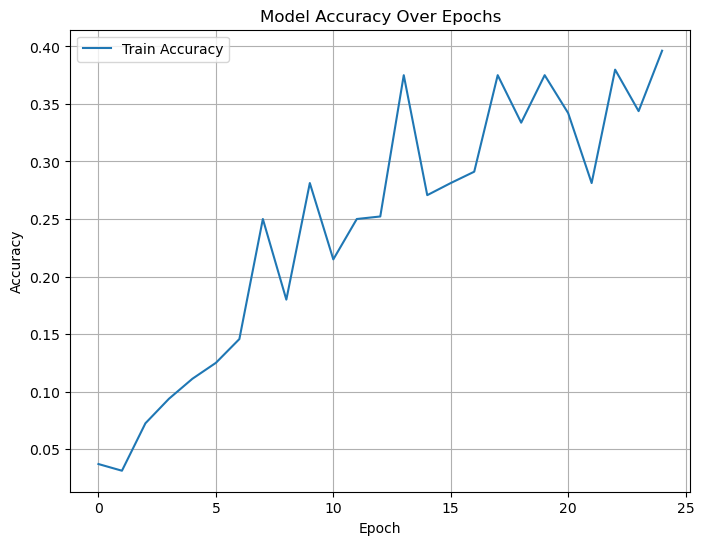

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(hirtory.history['accuracy'], label='Train Accuracy')
# plt.plot(hirtory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

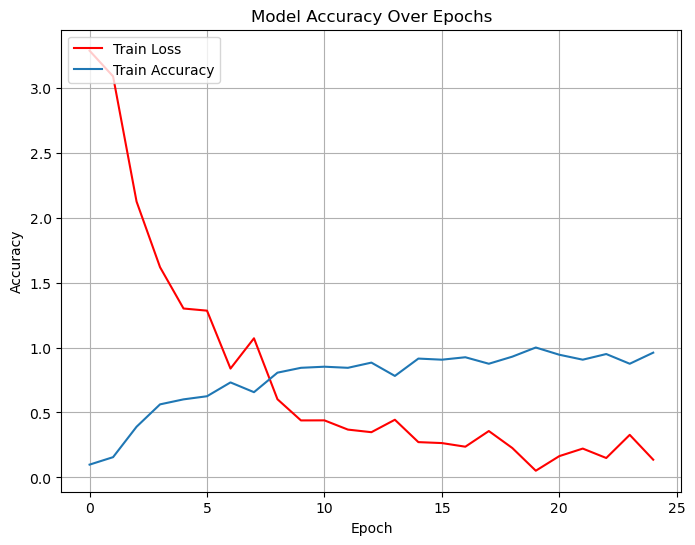

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(hiptory.history['loss'], label='Train Loss',color='red')
plt.plot(hiptory.history['accuracy'], label='Train Accuracy')
# plt.plot(hirtory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()